In [1]:
import pickle
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import graphviz

In [2]:
train = pd.read_pickle('train_bow.pkl')
test = pd.read_pickle('test_bow.pkl')

In [3]:
train.head()

,id,title,text_clean
0,619941,Loch Katrine,infobox lake name loch katrin imag loch katrin...
1,3884222,Bhadayasa,infobox royalti imag filebhadrayasha coinjpg a...
2,4229879,Lee Jones (author),lee jone onlin poker execut author win low lim...
3,5320685,School District 54 Bulkley Valley,infobox school district name school district b...
4,9146365,Combing,interlac disambiguationinterlaceth comb hairco...


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 
train_data_features = vectorizer.fit_transform(train['text_clean']).toarray()
print train_data_features.shape

(4379, 5000)


In [5]:
vocab = vectorizer.get_feature_names()
print vocab

[u'aaron', u'aba', u'abandon', u'abbrevi', u'abc', u'abdul', u'abdullah', u'abil', u'abkhazia', u'abl', u'abolish', u'aborigin', u'abort', u'abraham', u'abroad', u'absenc', u'absolut', u'absorb', u'abstract', u'abu', u'abus', u'academ', u'academi', u'acceler', u'accept', u'access', u'accessd', u'accid', u'acclaim', u'accommod', u'accompani', u'accomplish', u'accord', u'account', u'accredit', u'accur', u'accus', u'ace', u'achiev', u'acid', u'acknowledg', u'acoust', u'acquir', u'acquisit', u'acr', u'across', u'act', u'action', u'activ', u'activist', u'actor', u'actress', u'actual', u'ad', u'adam', u'adapt', u'add', u'addict', u'addit', u'address', u'adel', u'adelaid', u'adequ', u'adher', u'adjac', u'adjust', u'adler', u'administ', u'administr', u'admir', u'admiss', u'admit', u'adob', u'adolesc', u'adolf', u'adopt', u'adrian', u'adult', u'advanc', u'advantag', u'adventur', u'advers', u'advertis', u'advic', u'advis', u'advisor', u'advisori', u'advoc', u'advocaci', u'aerial', u'affair', u'a

In [6]:
feature_matrix = pd.DataFrame(train_data_features, index = train['title'], columns=vectorizer.get_feature_names())
print feature_matrix.shape

(4379, 5000)


In [7]:
np.std(feature_matrix, axis=0).sort_values(ascending=False)

team                 14.875814
school               13.589687
footbal              12.581339
score                12.022560
south                11.244580
websit               11.147089
florida              11.049099
bull                 10.930179
site                  8.548291
state                 8.214432
khorasan              7.917797
razavi                7.902604
primari               7.842394
alignleft             7.741755
kill                  7.084441
pkk                   6.772388
number                6.747027
parti                 6.587662
status                6.492045
post                  6.417832
women                 5.967165
haruto                5.908153
roc                   5.832750
new                   5.740120
polic                 5.706987
charter               5.674760
church                5.667382
turkish               5.634205
heritag               5.506049
band                  5.498403
                       ...    
culmin                0.149041
geo     

In [8]:
pov = pd.read_csv('POV.csv')
pov.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
pov['title_strip'] = pov['title'].map(lambda x: re.sub("'", '', x))
pov.head()

,id,title,title_strip
0,5597,'Politics of Cyprus',Politics of Cyprus
1,14668,'Economy of Iraq',Economy of Iraq
2,24400,'Pair programming',Pair programming
3,32783,'Antisemitism and the New Testament',Antisemitism and the New Testament
4,38424,'Bikram Yoga',Bikram Yoga


In [9]:
#add labels to train and test set
train['pov'] = train['title'].isin(pov['title_strip'])
test['pov'] = test['title'].isin(pov['title_strip'])

test.head()

,id,title,text_clean,pov
0,2936718,Meitei Christians,meitei christian christian movement base manip...,True
1,17023672,Musical expression,music express art play sing music emot communi...,True
2,37590035,READ 180,read read intervent program wide use student g...,True
3,3191002,The Ambulance,infobox film name ambul imag ambulancejpg imag...,False
4,24154353,Sifo Company,sifo compani busi sifo toy sifo novelti compan...,False


In [10]:
# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(test['text_clean'])
test_data_features = test_data_features.toarray()


In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

lda = LinearDiscriminantAnalysis().fit(feature_matrix, train['pov'])

/Users/rachelkogan/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [65]:
print "test score:", lda.score(test_data_features, test['pov'])
print "train score:", lda.score(train_data_features, train['pov'])

test score: 0.669201520913
train score: 1.0


In [66]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

qda = QuadraticDiscriminantAnalysis().fit(feature_matrix, train['pov'])

In [63]:
print "test score:", qda.score(test_data_features, test['pov'])
print "train score:", qda.score(train_data_features, train['pov'])

test score: 0.498732572877
train score: 1.0


In [44]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=.4) 

logit = logit.fit(feature_matrix, train['pov'])

In [45]:
print "test score:", logit.score(test_data_features, test['pov'])
print "train score:", logit.score(train_data_features, train['pov'])

test score: 0.783903675539
train score: 0.827586206897


In [46]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, criterion='entropy') 
forest = forest.fit(feature_matrix, train['pov'])

In [47]:
print "test score:", forest.score(test_data_features, test['pov'])
print "train score:", forest.score(train_data_features, train['pov'])

test score: 0.883396704689
train score: 1.0


In [48]:
from sklearn.svm import SVC
svc = SVC(C=100, kernel='linear') 
svc = svc.fit(feature_matrix, train['pov'])

In [49]:
print "test score:", svc.score(test_data_features, test['pov'])

test score: 0.841571609632


In [50]:
print "train score:", svc.score(train_data_features, train['pov'])

train score: 1.0


In [87]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
pca = PCA(n_components=1024)

In [ ]:
pca.explained_variance_ratio_[pca.explained_variance_ratio_>1.0/5000.0]

In [90]:
gnb = gnb.fit(X=pca.fit_transform(train_data_features), y=train['pov'])

In [91]:
print "test score:", gnb.score(pca.transform(test_data_features), test['pov'])
print "train score:", gnb.score(pca.transform(train_data_features), train['pov'])

test score: 0.697718631179
train score: 0.619776204613


In [95]:
gnb = gnb.fit(X=train_data_features, y=train['pov'])

In [97]:
print "test score:", gnb.score(test_data_features, test['pov'])
print "train score:", gnb.score(train_data_features, train['pov'])

 test score: 0.789607097592
train score: 0.89198447134


In [93]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(train_data_features, train['pov'])

In [94]:
print "test score:", mnb.score(test_data_features, test['pov'])
print "train score:", mnb.score(train_data_features, train['pov'])

test score: 0.794043092522
train score: 0.82164877826


In [51]:
import xgboost as xgb
dtrain = xgb.DMatrix(train_data_features, 
                    train['pov'])
d_val = xgb.DMatrix(test_data_features, 
                    test['pov'])

In [60]:
# hyperparameters
xgb_params = {
    'eta': 0.4,
    'max_depth': 2,
    'subsample': .8,
    'colsample_bytree': 0.7,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'silent': 1
}

In [61]:
sub_model = xgb.train(xgb_params, 
                      dtrain, 
                      num_boost_round=2000,
                      evals=[[dtrain, 'train'], (d_val, 'val')],
                      early_stopping_rounds=50, 
                      verbose_eval=20)

[0]	train-error:0.292533	val-error:0.347909
Multiple eval metrics have been passed: 'val-error' will be used for early stopping.

Will train until val-error hasn't improved in 50 rounds.
[20]	train-error:0.184517	val-error:0.241445
[40]	train-error:0.151861	val-error:0.216096
[60]	train-error:0.124229	val-error:0.201521
[80]	train-error:0.10733	val-error:0.185044
[100]	train-error:0.094314	val-error:0.174271
[120]	train-error:0.078328	val-error:0.167934
[140]	train-error:0.065768	val-error:0.159062
[160]	train-error:0.057091	val-error:0.154626
[180]	train-error:0.047728	val-error:0.147022
[200]	train-error:0.043617	val-error:0.146388
[220]	train-error:0.037223	val-error:0.147655
[240]	train-error:0.032427	val-error:0.142586
[260]	train-error:0.026033	val-error:0.140684
[280]	train-error:0.021238	val-error:0.137516
[300]	train-error:0.018497	val-error:0.131812
[320]	train-error:0.016214	val-error:0.131179
[340]	train-error:0.013702	val-error:0.129278
[360]	train-error:0.011646	val-error

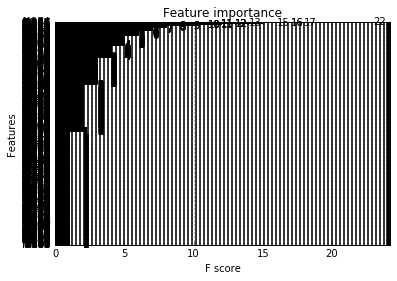

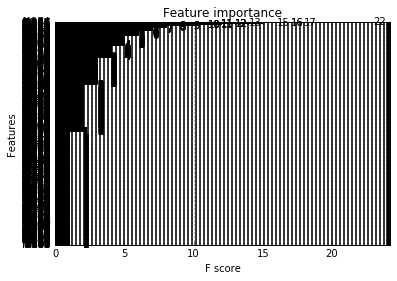

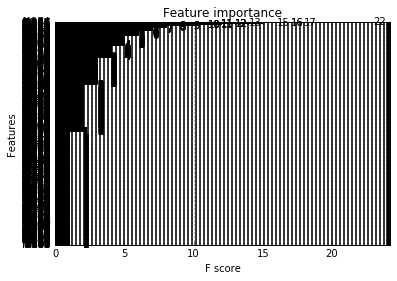

In [91]:
xgb.plot_importance(sub_model)
plt.show()

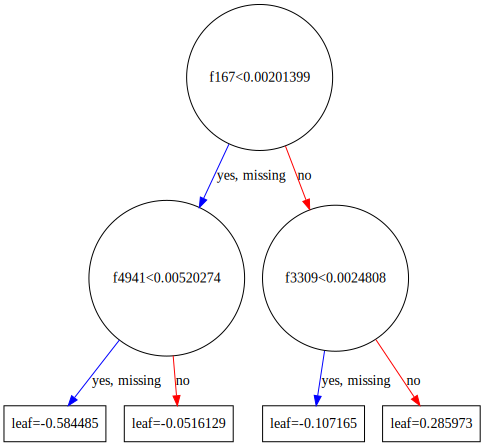

In [100]:
xgb.to_graphviz(sub_model)

In [101]:
vocab[167]

u'also'

In [40]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
train_data_features = tfidf.fit_transform(train['text_clean']).toarray()

In [41]:
tfidf.vocabulary_

{u'milit': 2844,
 u'wooden': 4939,
 u'dialogu': 1273,
 u'controversi': 1025,
 u'dna': 1339,
 u'dnp': 1340,
 u'yahoo': 4968,
 u'wrong': 4959,
 u'bratislava': 568,
 u'nbspkm': 3006,
 u'fit': 1733,
 u'nbspkg': 3005,
 u'nbspkw': 3007,
 u'master': 2758,
 u'tech': 4467,
 u'restaur': 3788,
 u'ira': 2314,
 u'wage': 4837,
 u'extend': 1616,
 u'extens': 1617,
 u'extent': 1618,
 u'regul': 3723,
 u'crowd': 1094,
 u'crown': 1095,
 u'fabric': 1625,
 u'chain': 750,
 u'chair': 751,
 u'ballet': 393,
 u'exact': 1575,
 u'abdullah': 6,
 u'travel': 4632,
 u'jin': 2375,
 u'jim': 2373,
 u'quarter': 3608,
 u'spoken': 4238,
 u'turner': 4673,
 u'borough': 550,
 u'isra': 2328,
 u'transact': 4619,
 u'fix': 1735,
 u'resolut': 3780,
 u'convinc': 1030,
 u'exercis': 1589,
 u'traffic': 4610,
 u'unesco': 4708,
 u'display': 1317,
 u'brazilian': 570,
 u'tripl': 4651,
 u'basqu': 419,
 u'creat': 1072,
 u'yoga': 4981,
 u'norm': 3086,
 u'sant': 3937,
 u'sang': 3936,
 u'sand': 3932,
 u'morn': 2916,
 u'compani': 927,
 u'learn':

In [42]:
feature_matrix = pd.DataFrame(train_data_features, index = train['title'], columns=tfidf.get_feature_names())
print feature_matrix.shape

(4379, 5000)


In [43]:
test_data_features = tfidf.transform(test['text_clean'])
test_data_features = test_data_features.toarray()